In [2]:
!pip install matplotlib

  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.58.1-cp312-cp312-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (106 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (323 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.58.1-cp312-cp312-manylinux_2_5_x86_64

In [3]:
import matplotlib.pyplot as plt


# Create a line plot

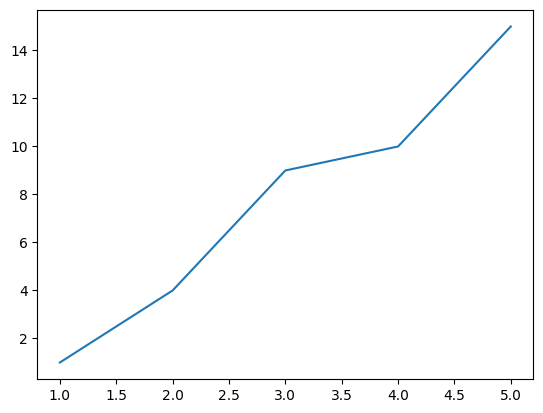

In [4]:
x=[1,2,3,4,5]
y=[1,4,9,10,15]
plt.plot(x,y)



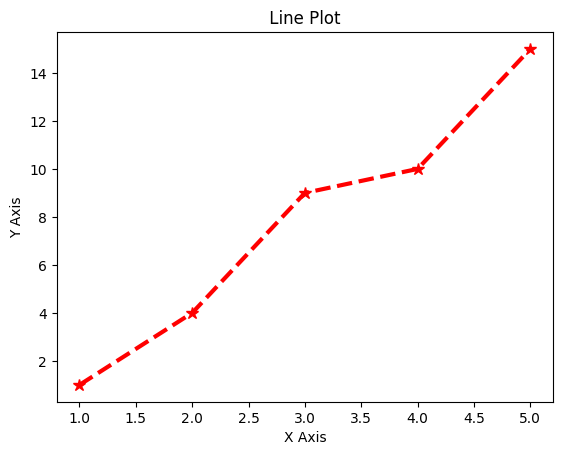

In [18]:
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title(' Line Plot ')
plt.plot(x,y,color='red',linestyle='--',marker='*',linewidth='3',markersize='9')


# Multiple plot

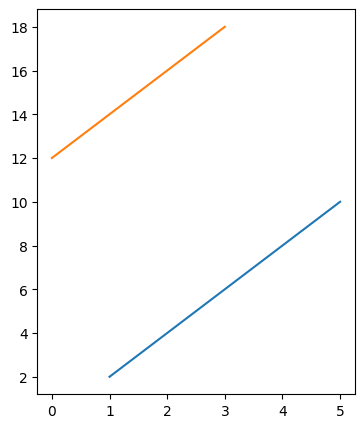

In [21]:
x=[1,2,3,4,5]
y1=[2,4,6,8,10]
y2=[12,14,16,18]

plt.figure(figsize=(9,5)) # ask chatgpt
plt.subplot(1,2,1) # ask chatgpt
plt.plot(x,y1,y2)

# Bar Plot

<BarContainer object of 5 artists>

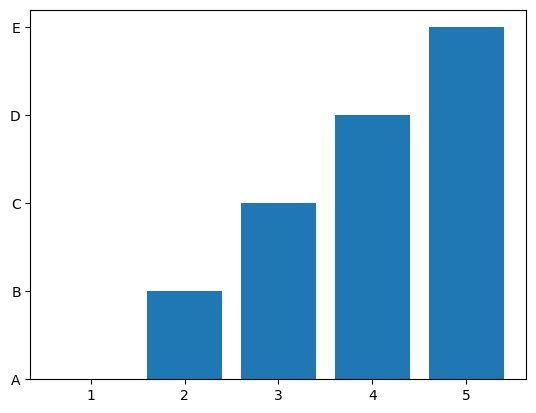

In [22]:
plt.bar([1,2,3,4,5],['A','B','C','D','E'])

# Histogram

> Histogram indicates the distribution of data

(array([9., 0., 0., 0., 1.]),
 array([ 1. , 20.4, 39.8, 59.2, 78.6, 98. ]),
 <BarContainer object of 5 artists>)

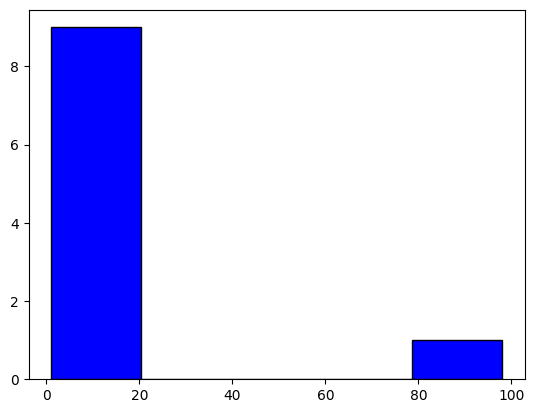

In [30]:
data=[1,1,1,2,3,5,6,8,98,8]
plt.hist(data,bins=5,color='blue',edgecolor='black')

# Scatter plot

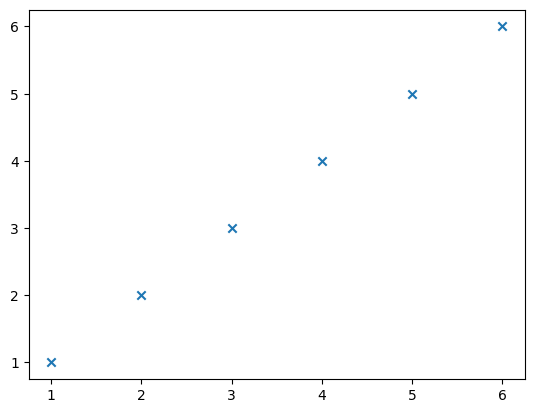

In [35]:
x=[1,2,3,4,5,6]
y=[1,2,3,4,5,6]
plt.scatter(x,y,marker='x')

# Pie Chart

([<matplotlib.patches.Wedge at 0x7791e1ac11c0>,
 [Text(0.7053422194240153, 0.9708204537905063, 'A'),
  Text(-0.8899187390319623, 0.6465637152823859, 'B'),
  Text(1.311736850028664e-08, -1.0999999999999999, 'C')],
 [Text(0.4114496279973422, 0.5663119313777952, '30.0%'),
  Text(-0.4854102212901612, 0.3526711174267559, '20.0%'),
  Text(7.1549282728836204e-09, -0.5999999999999999, '50.0%')])

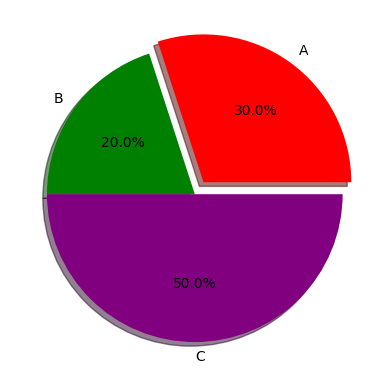

In [49]:
label=['A','B','C']
sizes=[30,20,50]
colors=['red','green','purple']
explode=[0.1,0,0]
plt.pie(sizes,explode=explode,labels=label,colors=colors,autopct="%1.1f%%",shadow=True)

/tmp/ipykernel_3577/2180697541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop("income_cat",axis=1,inplace=True)
/tmp/ipykernel_3577/2180697541.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop("income_cat",axis=1,inplace=True)


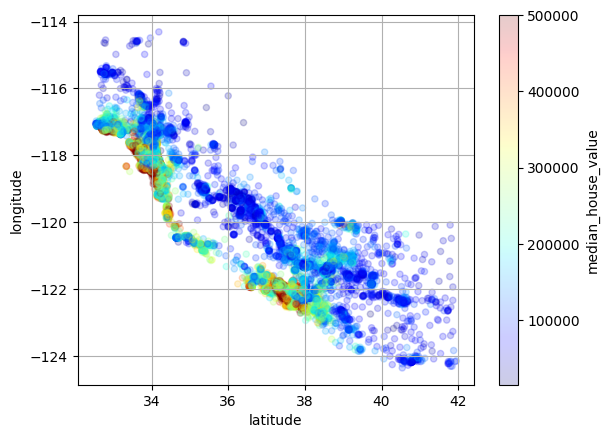

In [2]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("./6_Scikit_Learn/Data/housing.csv")

df=pd.DataFrame(data=data)

df["income_cat"]=pd.cut(df["median_income"],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])

split=StratifiedShuffleSplit()

for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train_set=df.iloc[train_index]
    strat_test_set=df.iloc[test_index]

# Lets remove income_cat column 

for st in (strat_train_set,strat_test_set):
    st.drop("income_cat",axis=1,inplace=True)


df1=strat_train_set.copy()
ax=df1.plot(kind="scatter",x="latitude",y="longitude",grid=True,alpha=0.2,cmap="jet",c="median_house_value")
plt.show()


array([[<Axes: xlabel='housing_median_age', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='median_house_value', ylabel='housing_median_age'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='median_house_value', ylabel='median_income'>],
       [<Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='median_house_value', ylabel='median_house_value'>]],
      dtype=object)

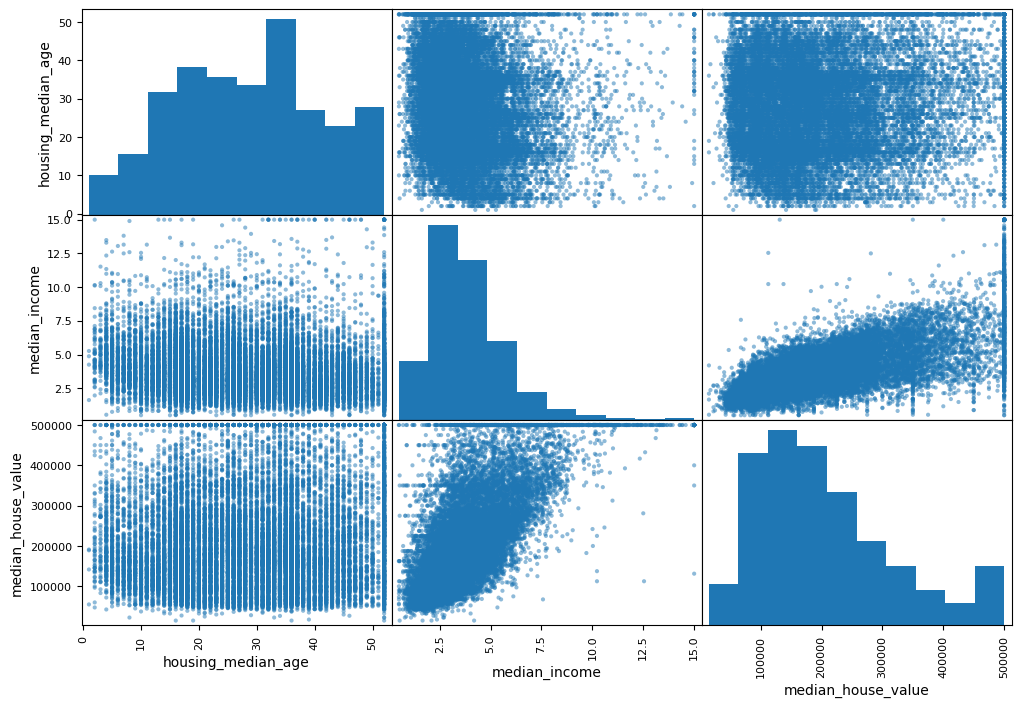

In [4]:
from pandas.plotting import scatter_matrix
attributes=["housing_median_age","median_income","median_house_value"]
scatter_matrix(df[attributes],figsize=(12,8))